In [1]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

In [2]:
crime_file = "housing_in_london_monthly_variables.csv"

In [3]:
#read the file
crime_df = pd.read_csv(crime_file, encoding="ISO-8859-1")
crime_df.head()

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1
2,1995-03-01,city of london,79121,E09000001,14.0,NaN,1
3,1995-04-01,city of london,77101,E09000001,7.0,NaN,1
4,1995-05-01,city of london,84409,E09000001,10.0,NaN,1


In [4]:
#drop any rows that contain any null values
crime_df.dropna(inplace=True)
crime_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,1
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,1
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,1
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,1
...,...,...,...,...,...,...,...
9931,2019-07-01,westminster,957897,E09000033,168.0,6991.0,1
9932,2019-08-01,westminster,914870,E09000033,156.0,7069.0,1
9933,2019-09-01,westminster,925955,E09000033,169.0,6384.0,1
9934,2019-10-01,westminster,927864,E09000033,168.0,7208.0,1


In [5]:
crime_df.drop_duplicates(keep=False, inplace=True)
crime_df

,date,area,average_price,code,houses_sold,no_of_crimes,borough_flag
72,2001-01-01,city of london,284262,E09000001,24.0,0.0,1
73,2001-02-01,city of london,198137,E09000001,37.0,0.0,1
74,2001-03-01,city of london,189033,E09000001,44.0,0.0,1
75,2001-04-01,city of london,205494,E09000001,38.0,0.0,1
76,2001-05-01,city of london,223459,E09000001,30.0,0.0,1
...,...,...,...,...,...,...,...
9931,2019-07-01,westminster,957897,E09000033,168.0,6991.0,1
9932,2019-08-01,westminster,914870,E09000033,156.0,7069.0,1
9933,2019-09-01,westminster,925955,E09000033,169.0,6384.0,1
9934,2019-10-01,westminster,927864,E09000033,168.0,7208.0,1


In [6]:
#find total number of areas
area_count = crime_df["area"].nunique()
area_count

33

In [7]:
#group the DataFrame by area name
grouped_area = crime_df.groupby(["area"])
grouped_area

In [8]:
houses_data = crime_df.groupby(["area"]).sum()["houses_sold"]
houses_data

area
barking and dagenham       45712.0
barnet                     95739.0
bexley                     71576.0
brent                      56862.0
bromley                   110245.0
camden                     53279.0
city of london              2824.0
croydon                   105603.0
ealing                     78070.0
enfield                    80629.0
greenwich                  73788.0
hackney                    50108.0
hammersmith and fulham     53402.0
haringey                   56709.0
harrow                     56324.0
havering                   72130.0
hillingdon                 75491.0
hounslow                   62014.0
islington                  51512.0
kensington and chelsea     51350.0
kingston upon thames       54117.0
lambeth                    86528.0
lewisham                   79943.0
merton                     62242.0
newham                     62986.0
redbridge                  73699.0
richmond upon thames       68933.0
southwark                  75387.0
sutton         

In [9]:
average_house_price_mean = crime_df.groupby(["area"]).mean()["average_price"].round(decimals=0)
average_house_price_mean

area
barking and dagenham      190136.0
barnet                    361831.0
bexley                    223516.0
brent                     323577.0
bromley                   299478.0
camden                    559213.0
city of london            336006.0
croydon                   246834.0
ealing                    325337.0
enfield                   264154.0
greenwich                 253481.0
hackney                   345281.0
hammersmith and fulham    527594.0
haringey                  349933.0
harrow                    317949.0
havering                  242141.0
hillingdon                275561.0
hounslow                  278601.0
islington                 436636.0
kensington and chelsea    888639.0
kingston upon thames      333349.0
lambeth                   334459.0
lewisham                  259659.0
merton                    334611.0
newham                    234716.0
redbridge                 278782.0
richmond upon thames      451974.0
southwark                 330712.0
sutton         

In [10]:
# Area
#per_area = grouped_area.size()

In [11]:
# Calculate the total crime count per area
crime_per_area = crime_df.groupby(["area"]).mean()["no_of_crimes"]
crime_per_area.round(decimals=0)

area
barking and dagenham      1599.0
barnet                    2276.0
bexley                    1298.0
brent                     2415.0
bromley                   2019.0
camden                    3055.0
city of london               0.0
croydon                   2651.0
ealing                    2607.0
enfield                   2074.0
greenwich                 2154.0
hackney                   2575.0
hammersmith and fulham    1915.0
haringey                  2406.0
harrow                    1255.0
havering                  1530.0
hillingdon                2141.0
hounslow                  2038.0
islington                 2516.0
kensington and chelsea    1831.0
kingston upon thames       991.0
lambeth                   3144.0
lewisham                  2296.0
merton                    1209.0
newham                    2851.0
redbridge                 1940.0
richmond upon thames      1041.0
southwark                 3028.0
sutton                    1077.0
tower hamlets             2540.0
walth

In [12]:
# Create a DataFrame called `per_area_summary` with columns for the calculations above.
per_area_summary = {
    "Houses sold": houses_data,
    "Number of crimes": crime_per_area,
    "Average House Price": average_house_price_mean
}

per_area_summary = pd.DataFrame(per_area_summary)


# Display the DataFrame
per_area_summary.head(5)

,Houses sold,Number of crimes,Average House Price
area,,,
barking and dagenham,45712.0,1598.656388,190136.0
barnet,95739.0,2275.502203,361831.0
bexley,71576.0,1297.638767,223516.0
brent,56862.0,2415.167401,323577.0
bromley,110245.0,2019.317181,299478.0


In [13]:
#drop city of london
per_area_summary.drop(index='city of london', axis=1, inplace=True) 
per_area_summary.head(5)

,Houses sold,Number of crimes,Average House Price
area,,,
barking and dagenham,45712.0,1598.656388,190136.0
barnet,95739.0,2275.502203,361831.0
bexley,71576.0,1297.638767,223516.0
brent,56862.0,2415.167401,323577.0
bromley,110245.0,2019.317181,299478.0


In [14]:
#highest price areas
top_price = per_area_summary.sort_values(by="Average House Price", ascending=False)
top_price.head(5)

,Houses sold,Number of crimes,Average House Price
area,,,
kensington and chelsea,51350.0,1830.942731,888639.0
westminster,73564.0,5276.991189,654077.0
camden,53279.0,3055.286344,559213.0
hammersmith and fulham,53402.0,1914.969163,527594.0
richmond upon thames,68933.0,1040.969163,451974.0


In [15]:
#highest crime areas
highest_crime = per_area_summary.sort_values(by="Number of crimes", ascending=False)
highest_crime.head(5)

,Houses sold,Number of crimes,Average House Price
area,,,
westminster,73564.0,5276.991189,654077.0
lambeth,86528.0,3143.911894,334459.0
camden,53279.0,3055.286344,559213.0
southwark,75387.0,3028.348018,330712.0
newham,62986.0,2850.775330,234716.0


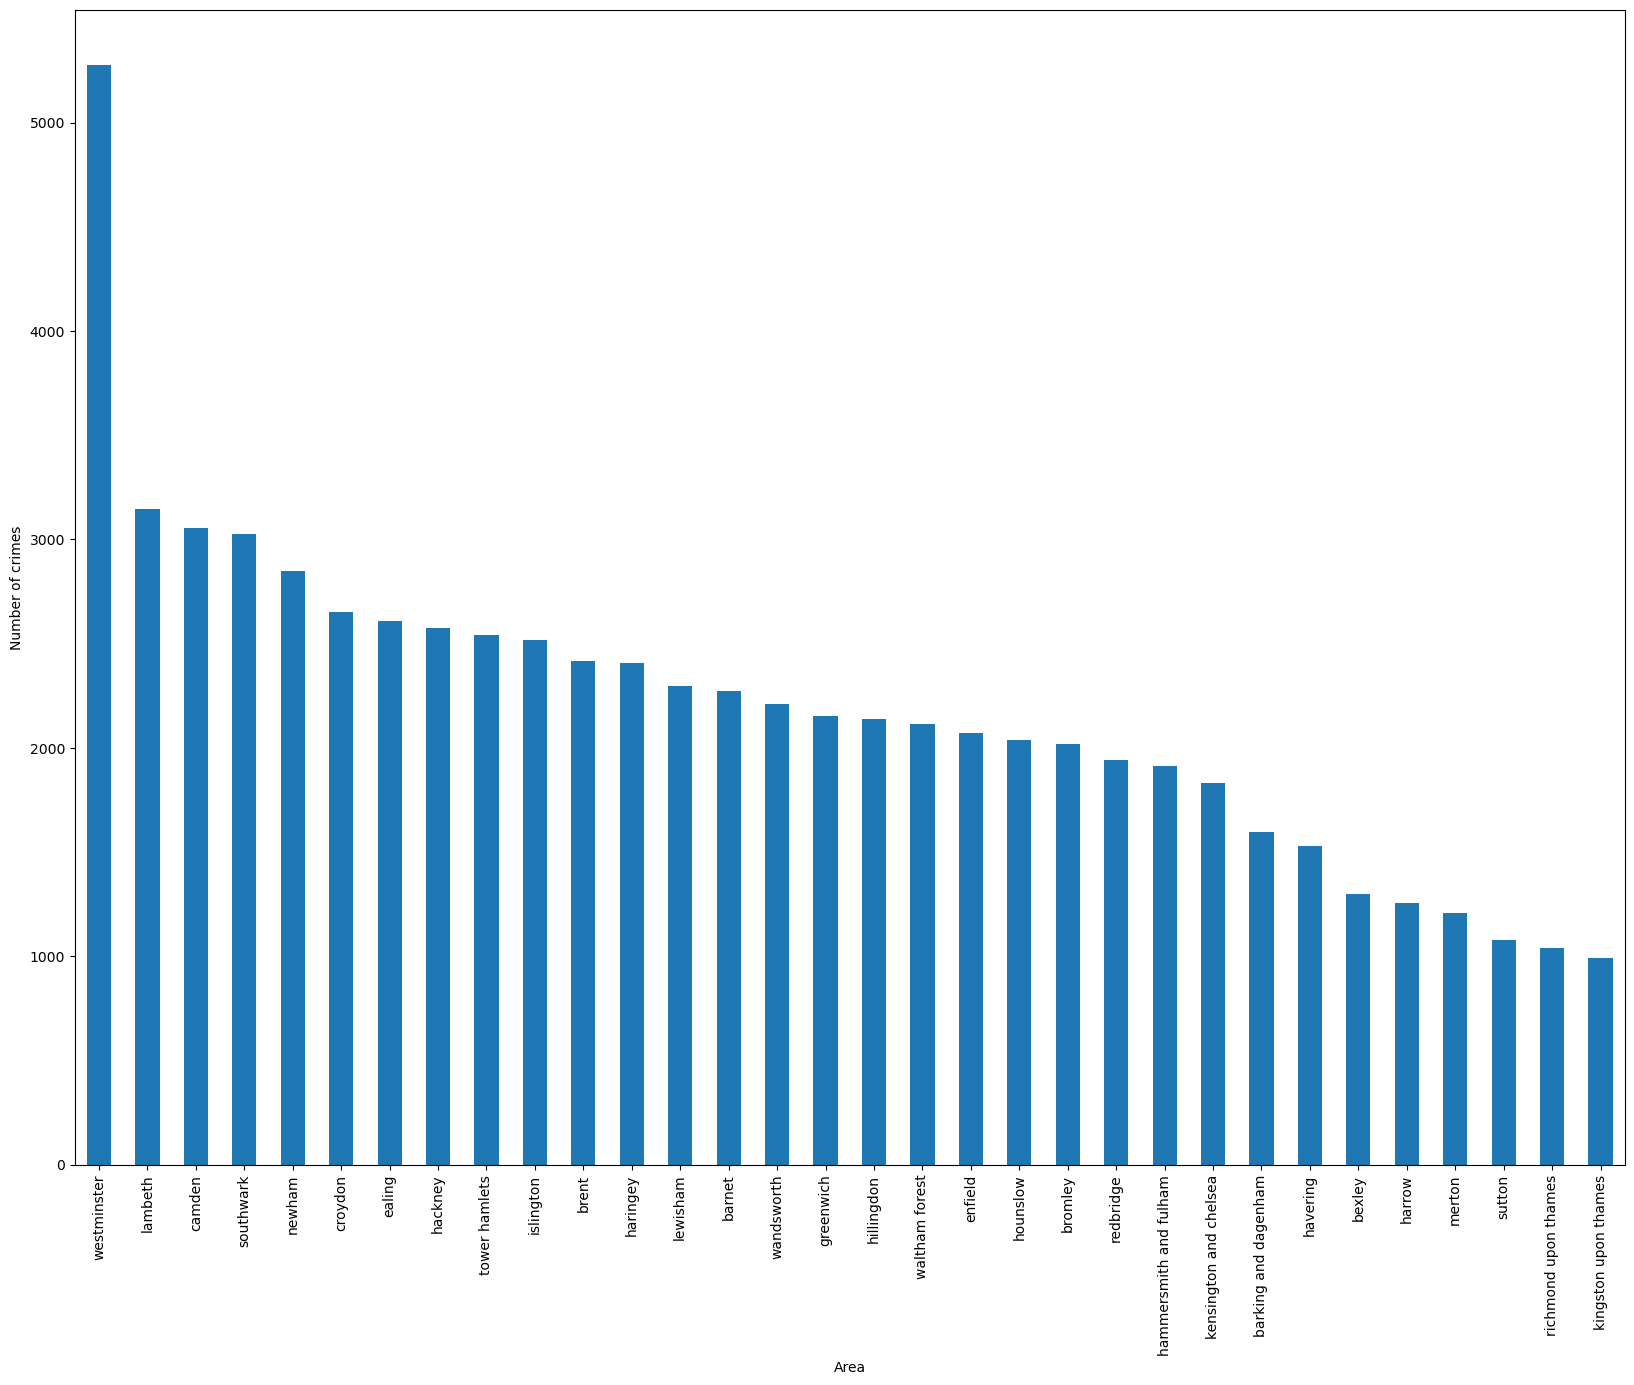

In [26]:
#bar plot with crime number vs areas

per_area_summary['Number of crimes'].sort_values(ascending=False).plot.bar(figsize=(20, 15))

plt.xlabel("Area")
plt.ylabel("Number of crimes")
#plt.figure().set_figwidth(15)
plt.xticks(rotation=90)

plt.savefig("Resources/Fig4.png")
plt.show()

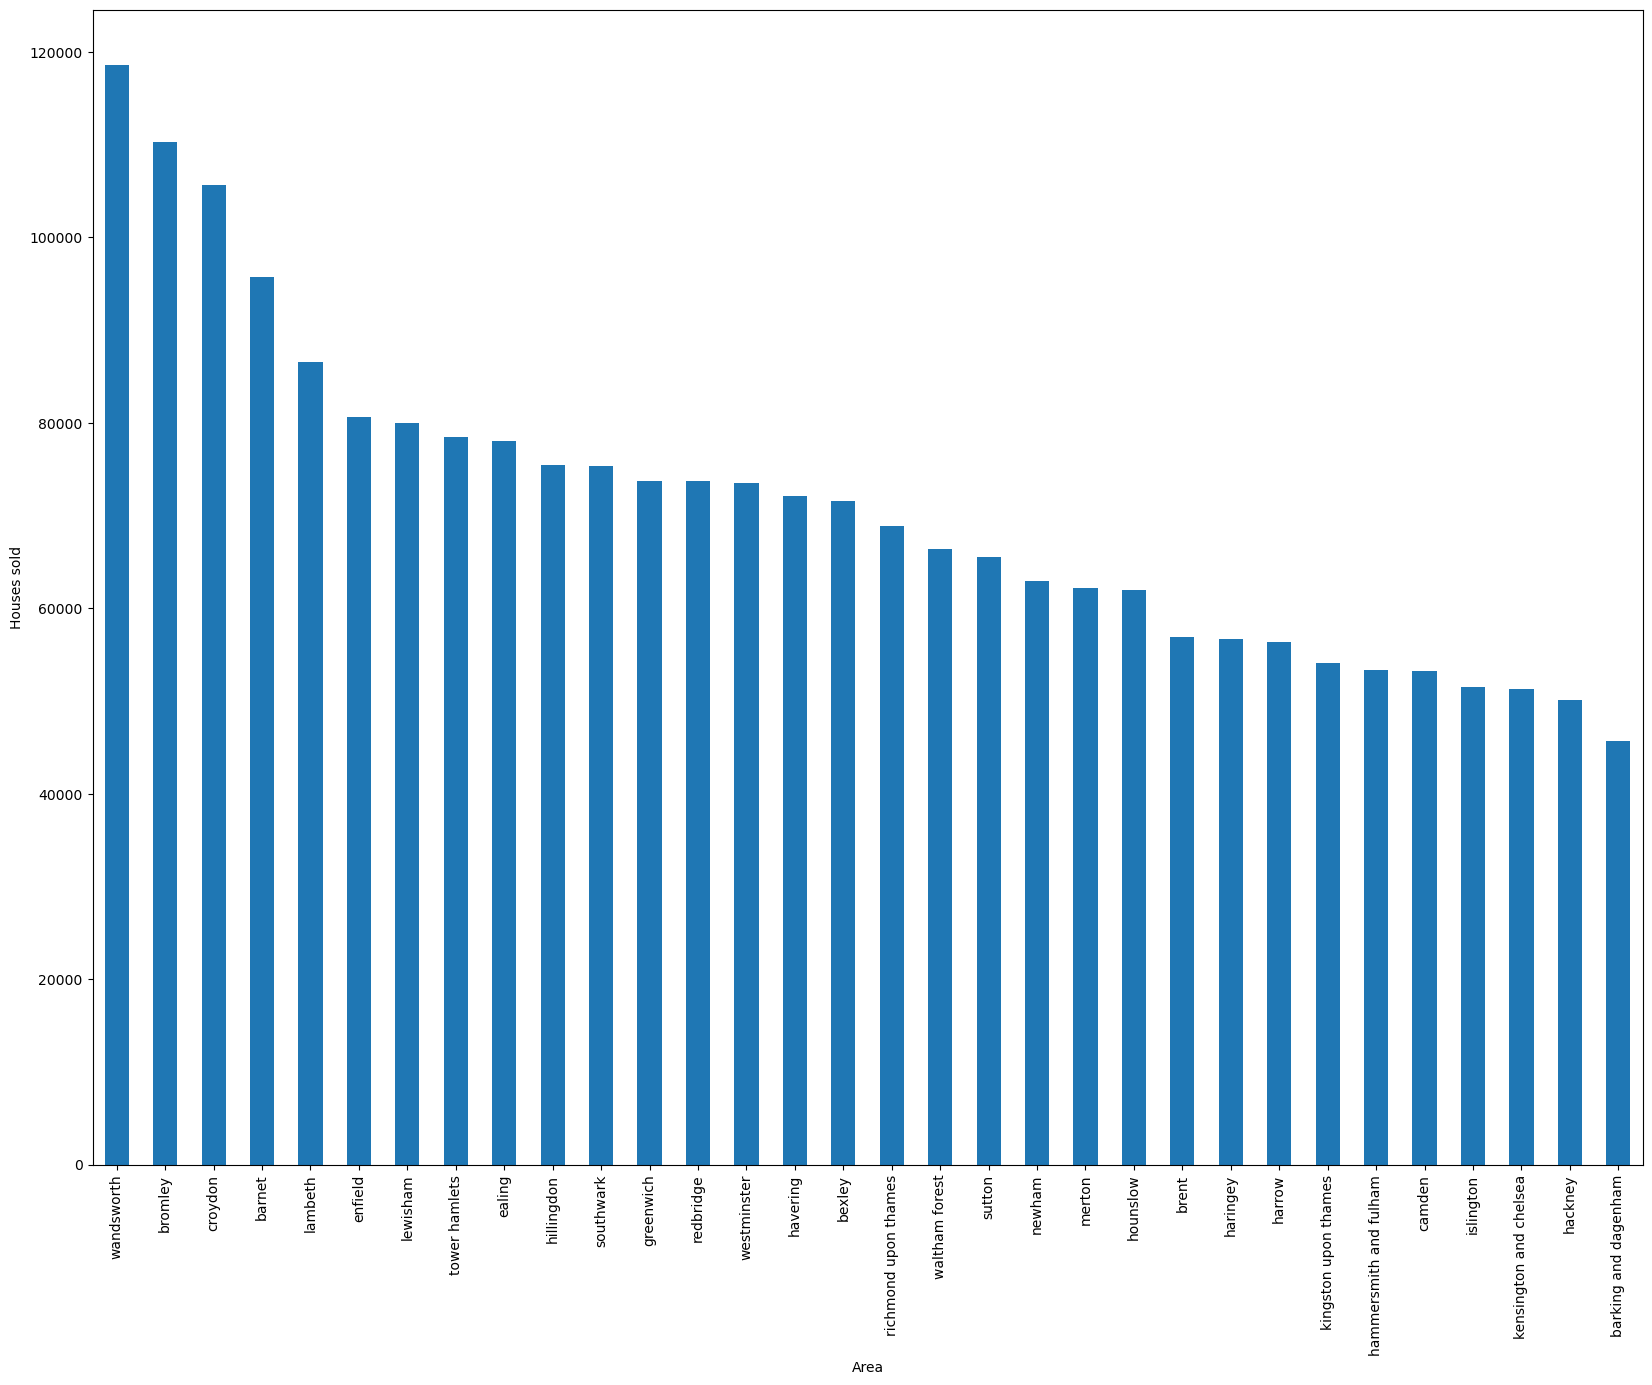

In [25]:
#bar plot with houses sold per area

per_area_summary['Houses sold'].sort_values(ascending=False).plot.bar(figsize=(20, 15))

plt.xlabel("Area")
plt.ylabel("Houses sold")
#plt.figure().set_figwidth(15)
plt.xticks(rotation=90)

plt.savefig("Resources/Fig3.png")
plt.show()

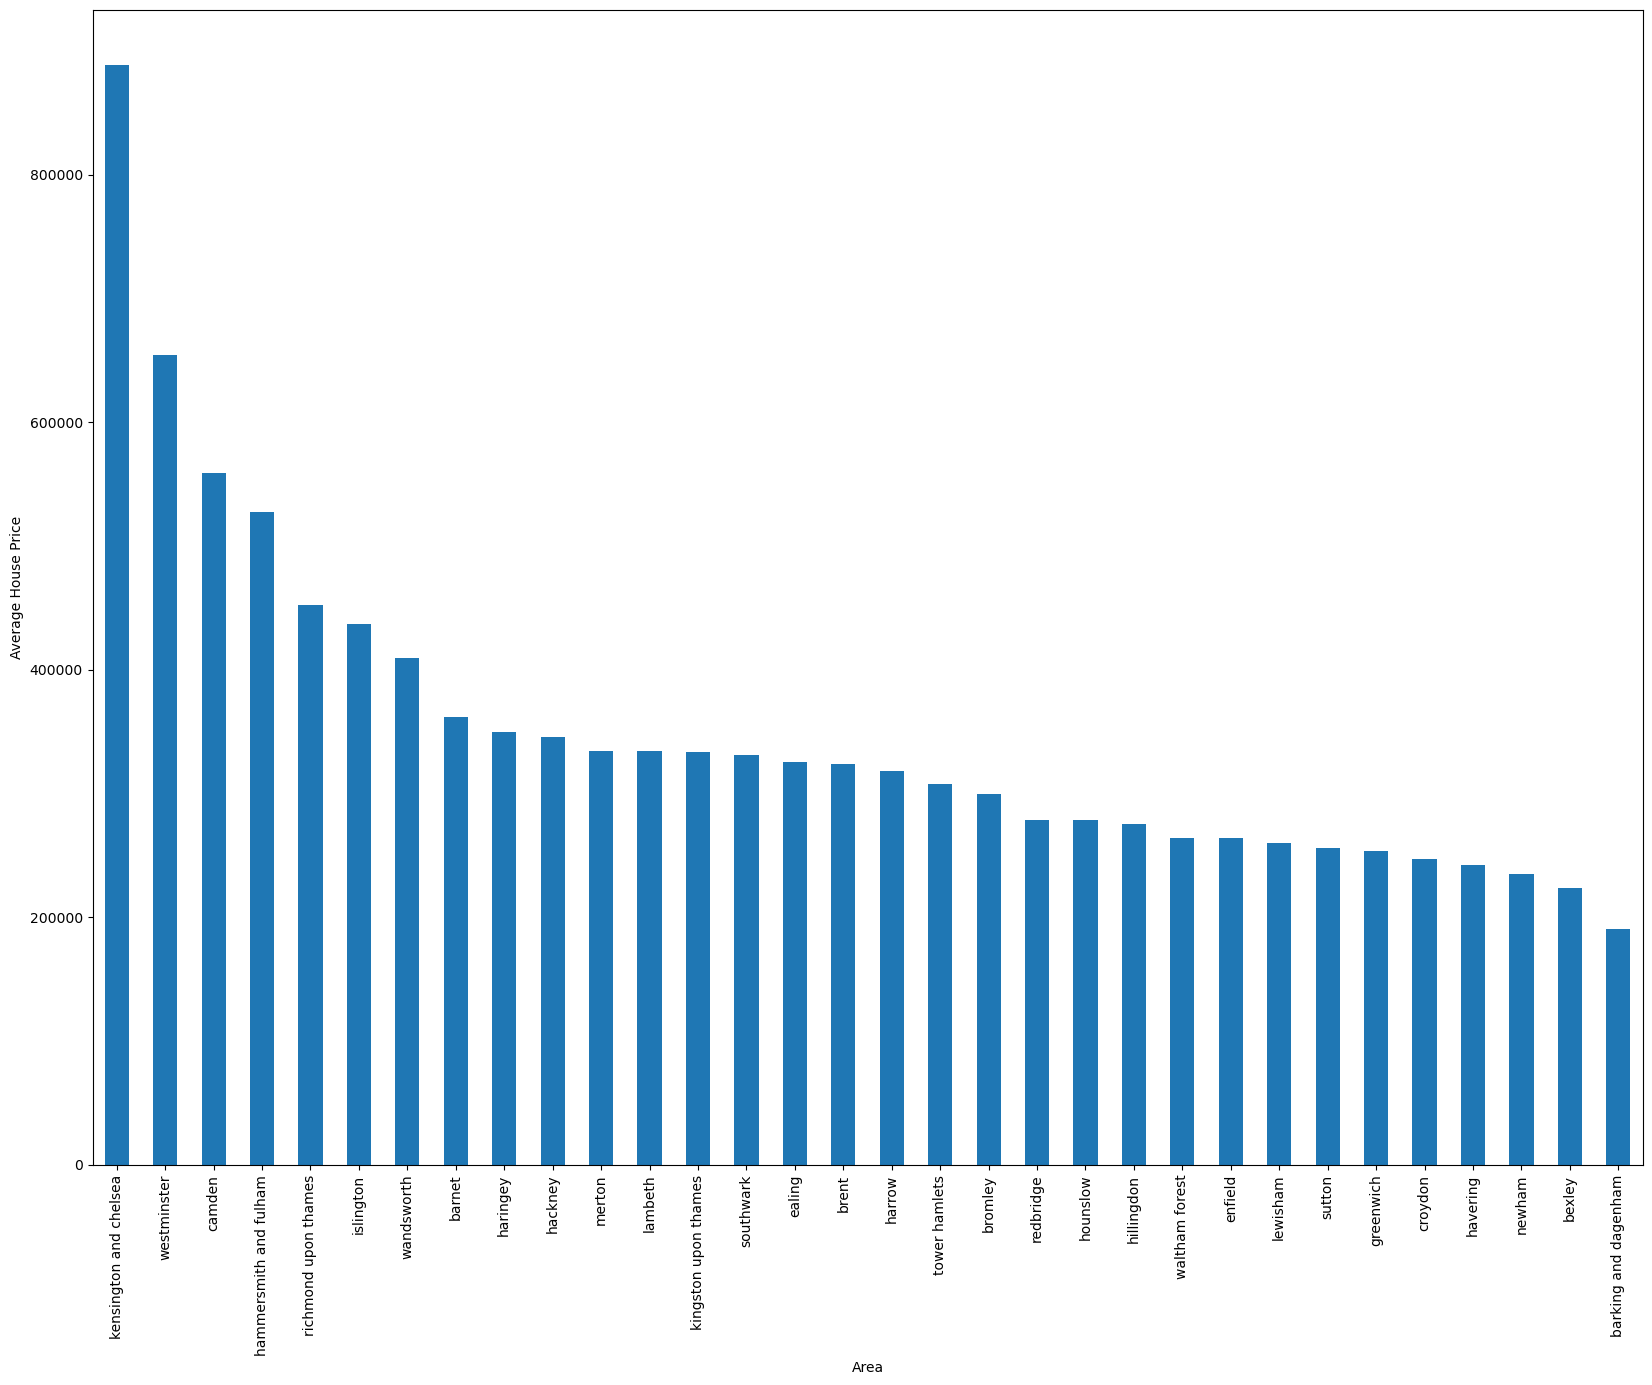

In [27]:
#bar plot with average price per area

per_area_summary['Average House Price'].sort_values(ascending=False).plot.bar(figsize=(20, 15))

plt.xlabel("Area")
plt.ylabel("Average House Price")
#plt.figure().set_figwidth(15)
plt.xticks(rotation=90)

plt.savefig("Resources/Fig2.png")
plt.show()

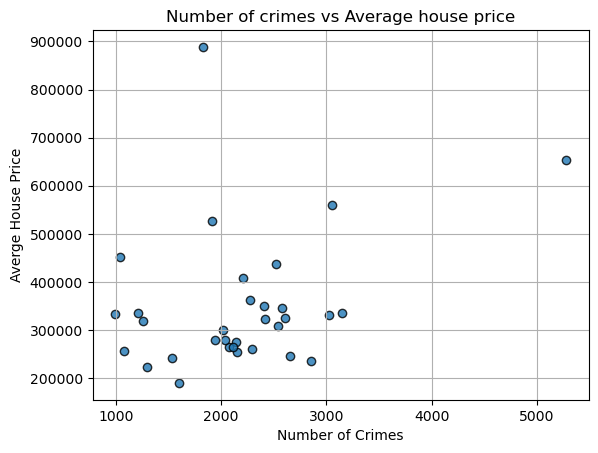

In [19]:
# Build scatter plot for crimes vs average house price
crime = per_area_summary["Number of crimes"]
price = per_area_summary["Average House Price"]

plt.scatter(crime, price, marker="o", alpha=0.8, edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Number of Crimes")
plt.ylabel("Averge House Price")
plt.title(f"Number of crimes vs Average house price")
plt.grid(True)

# Save the figure
plt.savefig("Resources/Fig1.png")

# Show plot
plt.show()

In [20]:
#calculte correlation between average hopuse price and number of crimes
per_area_summary['Number of crimes'].corr(per_area_summary['Average House Price'])

0.30556089651634355

From the bar plot representing the average house price vs areas, we can see that the highest house prices are in following areas:
    Kensington and Chelsea
    Westminster
    Camden
    Hammersmith&Fullham
    Richmond upon Thames
    Islington.
    
From the bar plot representing the number of crimes per area, we can observe a much higher number of crimes in Westminster, which is skewing the data. However, this is likely due to Westminster (and other high crime concentration areas) being a busy tourist spot. This explains the high amount of price.

According to the correlation calculation and the scatter plot, we see a weak corrwlation between the average house price and the number of crimes. In the future research it may help to remove some of the city centre and tourist reas from the data to help understand this potential correlation better. The data is also not the most reliable as some areas were lacking in crime numbers or the crimes statistics was recorded poorly.